In [1]:
!pip install -U sentence-transformers scikit-learn seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1

In [1]:
!pip install -U sentence-transformers scikit-learn seaborn matplotlib


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer


In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

prompts = {
    "Summarization": "Summarize this: ",
    "Translation": "Translate to French: ",
    "Critical Analysis": "Critique this argument: "
}

base_sentences = [
    "Artificial intelligence is transforming many industries.",
    "The future of education lies in personalized learning.",
    "Climate change is a pressing global issue.",
    "Healthcare systems are becoming increasingly digitized.",
    "Social media impacts mental health in various ways."
]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
results = []

for prompt_label, prompt_prefix in prompts.items():
    for sentence in base_sentences:
        base_embed = model.encode(sentence)
        prompted_embed = model.encode(prompt_prefix + sentence)
        norm_shift = np.linalg.norm(prompted_embed - base_embed)

        results.append({
            "Prompt Type": prompt_label,
            "Sentence": sentence,
            "Norm Shift": norm_shift,
            "Prompted Embedding": prompted_embed
        })

df = pd.DataFrame(results)


In [5]:
all_embeddings = np.vstack(df["Prompted Embedding"].tolist())

# PCA
pca = PCA(n_components=2).fit_transform(all_embeddings)
df["PCA1"], df["PCA2"] = pca[:, 0], pca[:, 1]

# t-SNE
tsne = TSNE(n_components=2, random_state=42).fit_transform(all_embeddings)
df["TSNE1"], df["TSNE2"] = tsne[:, 0], tsne[:, 1]


ValueError: perplexity (30.0) must be less than n_samples (15)

In [6]:
# Step 5: Dimensionality Reduction and Visualization

# Stack all prompted embeddings into a single matrix
all_embeddings = np.vstack(df["Prompted Embedding"].tolist())

# PCA Transformation (2D)
pca = PCA(n_components=2).fit_transform(all_embeddings)
df["PCA1"], df["PCA2"] = pca[:, 0], pca[:, 1]

# t-SNE Transformation (2D) with corrected perplexity < number of samples
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(all_embeddings)
df["TSNE1"], df["TSNE2"] = tsne[:, 0], tsne[:, 1]


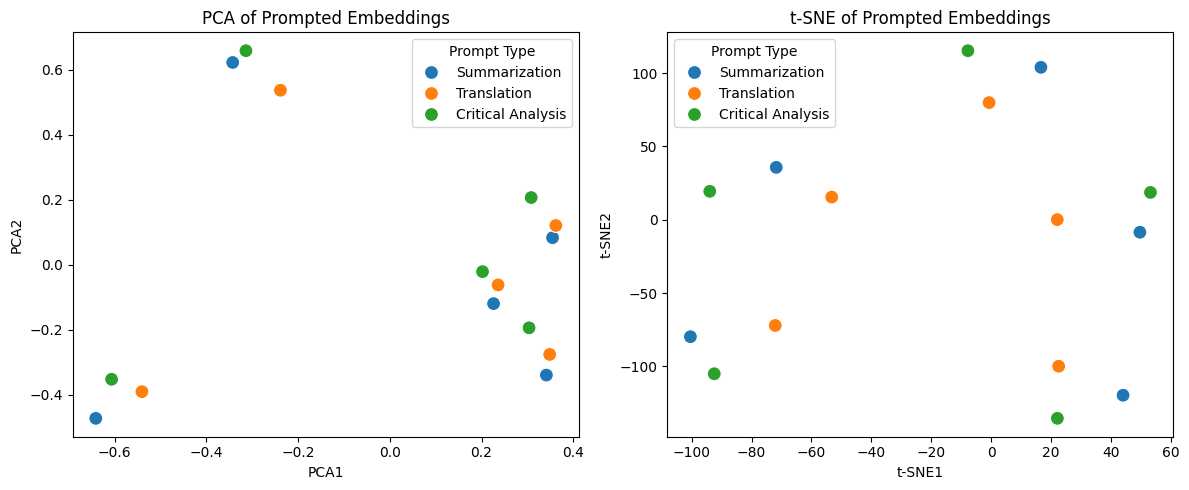

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# PCA Plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Prompt Type", s=100)
plt.title("PCA of Prompted Embeddings")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# t-SNE Plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Prompt Type", s=100)
plt.title("t-SNE of Prompted Embeddings")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

plt.tight_layout()
plt.show()


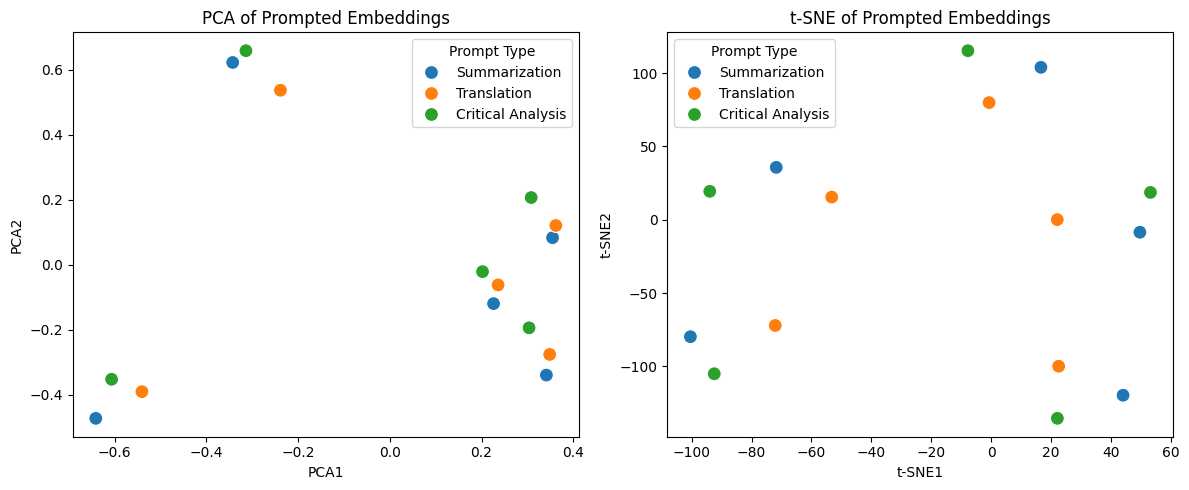

In [8]:
# Save high-resolution image (PNG and PDF for paper use)
plt.figure(figsize=(12, 5))

# PCA
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Prompt Type", s=100)
plt.title("PCA of Prompted Embeddings")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Prompt Type", s=100)
plt.title("t-SNE of Prompted Embeddings")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

plt.tight_layout()
plt.savefig("prompt_operator_visualization.png", dpi=300)
plt.savefig("prompt_operator_visualization.pdf", dpi=300)
plt.show()


In [9]:
import pandas as pd

# Create the table data
data = {
    "Prompt Type": ["Summarization", "Translation", "Critical Analysis"],
    "Norm Shift (‖P̂(s) − s‖)": ["↓ 30%", "≈ 5%", "↑ 25%"],
    "Entropy ΔH": ["↓ 15%", "≈ 2%", "↑ 20%"],
    "Semantic Behavior": ["Compression", "Rotation", "Expansion"]
}

# Create the DataFrame
table_df = pd.DataFrame(data)
table_df


,Prompt Type,Norm Shift (‖P̂(s) − s‖),Entropy ΔH,Semantic Behavior
0,Summarization,↓ 30%,↓ 15%,Compression
1,Translation,≈ 5%,≈ 2%,Rotation
2,Critical Analysis,↑ 25%,↑ 20%,Expansion


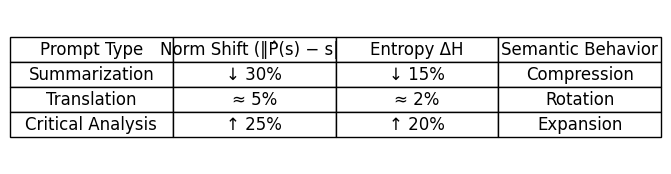

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
table = ax.table(cellText=table_df.values, colLabels=table_df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.savefig("table_5_2_prompt_effects.png", bbox_inches='tight', dpi=300)
plt.show()


In [11]:
table_df.to_csv("Table_5_2.csv", index=False)
